# CIE 632: Machine Learning Fundamentals - Spring 2022
# Assignment 1 - Due Date: April 16, 2022
# Name: Ahmed Salem Mohamed Elhady


# Instructions

This assignment is based on "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

Please answer each question in the corresponding cell

# Question 1 (2 marks)

Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages and disadvantages of each one?

Answer:


# Question 3 (4 marks)

Suppose we have a data set with five predictors, X1 =GPA, X2 = IQ, X3 = Gender (1 for Female and 0 forMale), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get β0 = 50, β1 = 20, β2 = 0.07, β3 = 35, β4 = 0.01, β5 = −10.

a) Which answer is correct, and why?

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.

c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

Answer:

**a) Answer is (iii) males earn more on average than females provided that the GPA is high enough.**
Justification:

Replacing the values 1 for female, and 0 for male, we have two equations:

y_male = 50 + 20 * GPA + 0.07 * iq + 0.01* (GPA * iq)

y_fem = 85 + 10 * GPA + 0.07 * iq + 0.01*(GPA * iq)

First, we cannot say for sure males earn higher or lower since the equation has variables.  
But for fixed value of IQ & GPA: compare if:

1.  y_male == y_fem : impossible since (50+20*GPA != 85 + 10*GPA) for the same GPA.
2. y_male > y_fem: then:
50 + 20 * GPA + 0.07 * iq + 0.01* (GPA * iq) **>** 85 + 10 * GPA + 0.07 * iq + 0.01 * (GPA * iq)

> simplified to: (20-10) * GPA > 85-50

>  then: 10 * GPA > 85-50, then GPA > 3.5

3. like 2: if y_fem > y_male:
> Holds true for GPA < 3.5:




b) From (a): y_fem = 85 + 10 * GPA + 0.07 * iq + 0.01*(GPA * iq)
Then:
y_fem = 85 + 10*4 + 0.07*110 + 0.01*4*110 = 137.1

c) False. The coefficient is not deterministic enough whether the interaction was effective or not. We need to check its p-value and make sure it is significant (null hypothes that the coefficient=0 can then be rejected). 


# Question 4 (2 marks)

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. $Y = β_0 + β_1X + β_2X^2 + β_3X^3 + \epsilon$.

a) Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = β_0 + β_1X + \epsilon$. Consider the training residual sum of squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

b) Answer (a) using test rather than training RSS.

Answer:

a) There is not enough information about the data or the models to determine this, at least we need to compare the coefficients because:
1. since the true relation is linear, if data are well distributed then we can expect the linear regression to be too close to the true relation, therefore its RSS will be smaller.
2. But, we can also expect the cubic regression to overfit perfectly over the 100 observations rendering smaller RSS than the linear regressor. 

b) knowing that the true relation is linear, we can expect that the linear regression will have lower tes RSS than the overfitted cubic regression, even if the linear model is not quite accurate.

# Question 5 (12 marks)

This question involves Auto data set which can be downladed from https://www.statlearning.com/resources-second-edition

The data concerns city-cycle fuel consumption which is measured as miles per gallon (mpg). It is required to be predicted in terms of the following features: cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name (unique for each instance, omit it in your models)

Split the data as: 80% for training and 20% for test using random_state=191
i.e. train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=191)
Use the training set to build all your models

a) Load the data set, impute the missing values (if needed).

b) Based on scatter plots and correlation, do you find a relation between the response and the features? How strong are they?

c) Perform a linear regression model using a single feature and an intercept. Plot the response versus the feature. If a model based on a single feature is to be used, which one do you select? Why?

d) Perform a linear regression model using all features (except name) and intercept.

e) By gradually removing the insignificant features from the model in (d), find a smaller model where all the features are significant.

f) Perform Ridge regression. Use 5-fold cross validation to estimate the best λ over a grid of values ranging from λ = $10^{10}$ to $10^{−2}$.

g) Perform Lasso regression. Use the same settings as in (g).

h) Perform KNN regressor using all possible pairs of features. Use 5-fold cross validation to estimate the best K over a grid of odd values ranging from K = 1 to 9.

i) Perform KNN regressor using all features (except name). Use the same settings as in (h).

j) Which model do you prefer from all the models obtained above? Why?

In [1]:
import pandas as pd 
import numpy as np

In [2]:
# a)
data = pd.read_csv("./Auto.csv", header=0)

In [3]:
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [4]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
## imputation neaded because of the '?' value
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
## there are 5 values, 
# we can drop them entirely or replace the horsepower with the mean of its values in the dataset, 
# I chose imputation
data[data['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [7]:
## impute '?' with the mean:
horsepower_mean = np.mean(data[data['horsepower']!='?']['horsepower'].to_numpy(dtype='float'))
data.loc[data['horsepower'] == '?','horsepower'] = horsepower_mean


In [12]:
## split to train-test
from sklearn.model_selection import train_test_split

In [8]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [9]:
X = data[data.columns[1:-1]]
Y = data[data.columns[0]]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=191)

In [14]:
# b) Correlations:
data.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000


'\nCorrelation between response and variables\n    1. Very high negative correlation between the response and (cylinders, displacement, weight)\n    2. moderate correlation between other variables and the response (mpg) very high correlation between \n\nCorrelation between variables and one another\n    1. Cylinders are highly correlated with weight and displacement (can lead to colinearity)?\n    2. Displacement is very highly correlated to weight\n    3. Origin and displacement have modertly negative correlation\n    \nWe notice also:\n    Origin is categorical\n'

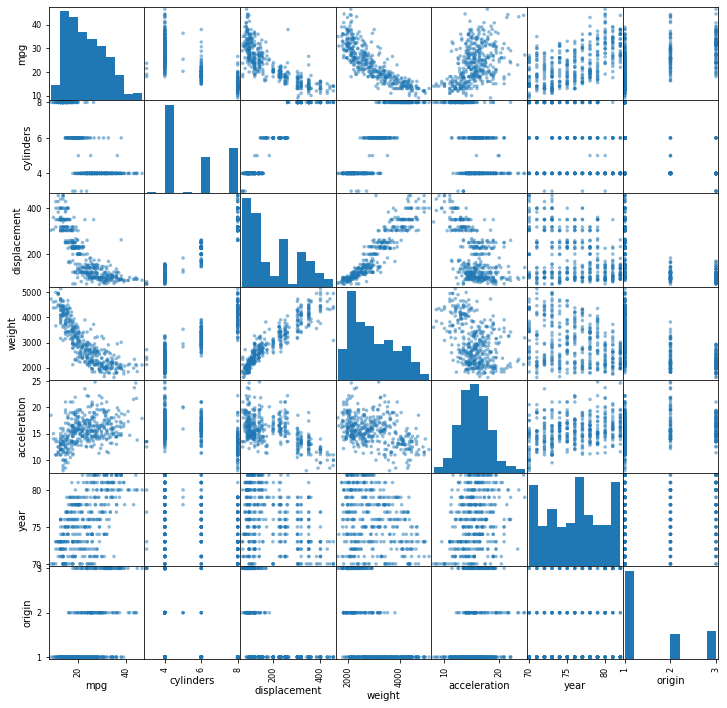

In [15]:
# scatter plots:
pd.plotting.scatter_matrix(data, figsize=(12, 12), s=50);
# observing the plots and correlation values:
'''
Correlation between response and variables
    1. Very high negative correlation between the response and (cylinders, displacement, weight)
    2. moderate correlation between other variables and the response (mpg) very high correlation between 

Correlation between variables and one another
    1. Cylinders are highly correlated with weight and displacement (can lead to colinearity)?
    2. Displacement is very highly correlated to weight
    3. Origin and displacement have modertly negative correlation
    
We notice also:
    Origin is categorical
'''

In [16]:
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

In [48]:
def encode_categorical_values(x, prefix_name="data"):
    return pd.get_dummies(x, prefix=prefix_name, prefix_sep="_")

In [49]:
# c) 
def fit_linear_regression(target, predictor, add_intercept=False, is_categorical=False):
    ### fits ordinary least square regression model from the target onto the predictor ###
    
    if is_categorical:
        predictor = encode_categorical_values(predictor)
    if add_intercept:
        ## add a column of 1s to the data corresponding to the y-intercept (bias term)
        predictor = sm.add_constant(predictor)
        
    target = target.to_numpy( dtype=float)
    predictor = predictor.to_numpy( dtype=float)
    model = sm.OLS(target, predictor).fit()
    return model


In [50]:
def predict(model, predictor, add_intercept=False, is_categorical=False):
    if is_categorical:
        predictor = encode_categorical_values(predictor)
    if add_intercept:
        ## add a column of 1s to the data corresponding to the y-intercept (bias term)
        print("Adding column of constants to predictor")
        predictor = sm.add_constant(predictor)
  
    predictor = predictor.to_numpy( dtype=float)
    return model.predict(predictor)
    
    

In [51]:
import matplotlib.pyplot as plt

def plot_train_test_response(X_test, y_test_true, model_prediction, model_name):

    '''
    fig, ax = plt.subplots()
    ax.plot(x_train, y_train, "o", label="Training Data")
    
    linespace = np.hstack(x_train, X_test)
    y_values = n
    ax.plot(, model_prediction, 'r',label=model_name)
    '''
    plt.scatter(X_test, y_test_true, color="red", label="true values")
    plt.scatter(X_test, model_prediction, linewidth=1, label=f"{model_name}'s predictions'")

    plt.xticks(())
    plt.yticks(())
    
    plt.show()
    #ax.legend(loc="best")

In [56]:
def plot_train_test_response2(x_test, y_true, predictions_list, models_names,  y_axis_label='mpg'):
    
    ### Plotting code adapted from (https://stackoverflow.com/a/67549881)
    assert len(predictions_list) == len(models_names)
    
    # create the figure
    fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))

    # flatten the axes to make it easier to index
    axes = axes.flatten()

    # iterate through the column values, and use i to index the axes
    i = 0
    for name, y_pred in zip(models_names, predictions_list):
        
        data = x_test[name]
        # plot the actual values against the features
        axes[i].scatter(x=data, y=y_true, s=70, ec='white', label='actual')

        # plot predicted prices against the features
        axes[i].scatter(x=data, y=y_pred, c='red', s=50, ec='white', alpha=0.5, label=name)

        # set the title and ylabel
        axes[i].set(title=f'Feature: {name}', ylabel=y_axis_label)
        i+=1

    # set a single legend
    #axes[12].legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')

    # delete the last 3 unused axes
    #for v in range(13, 16):
    #    fig.delaxes(axes[v])

Fitting model of target MPG onto cylinders
Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     132.7
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           4.72e-66
Time:                        23:39:39   Log-Likelihood:                -945.81
No. Observations:                 317   AIC:                             1902.
Df Residuals:                     312   BIC:                             1920.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

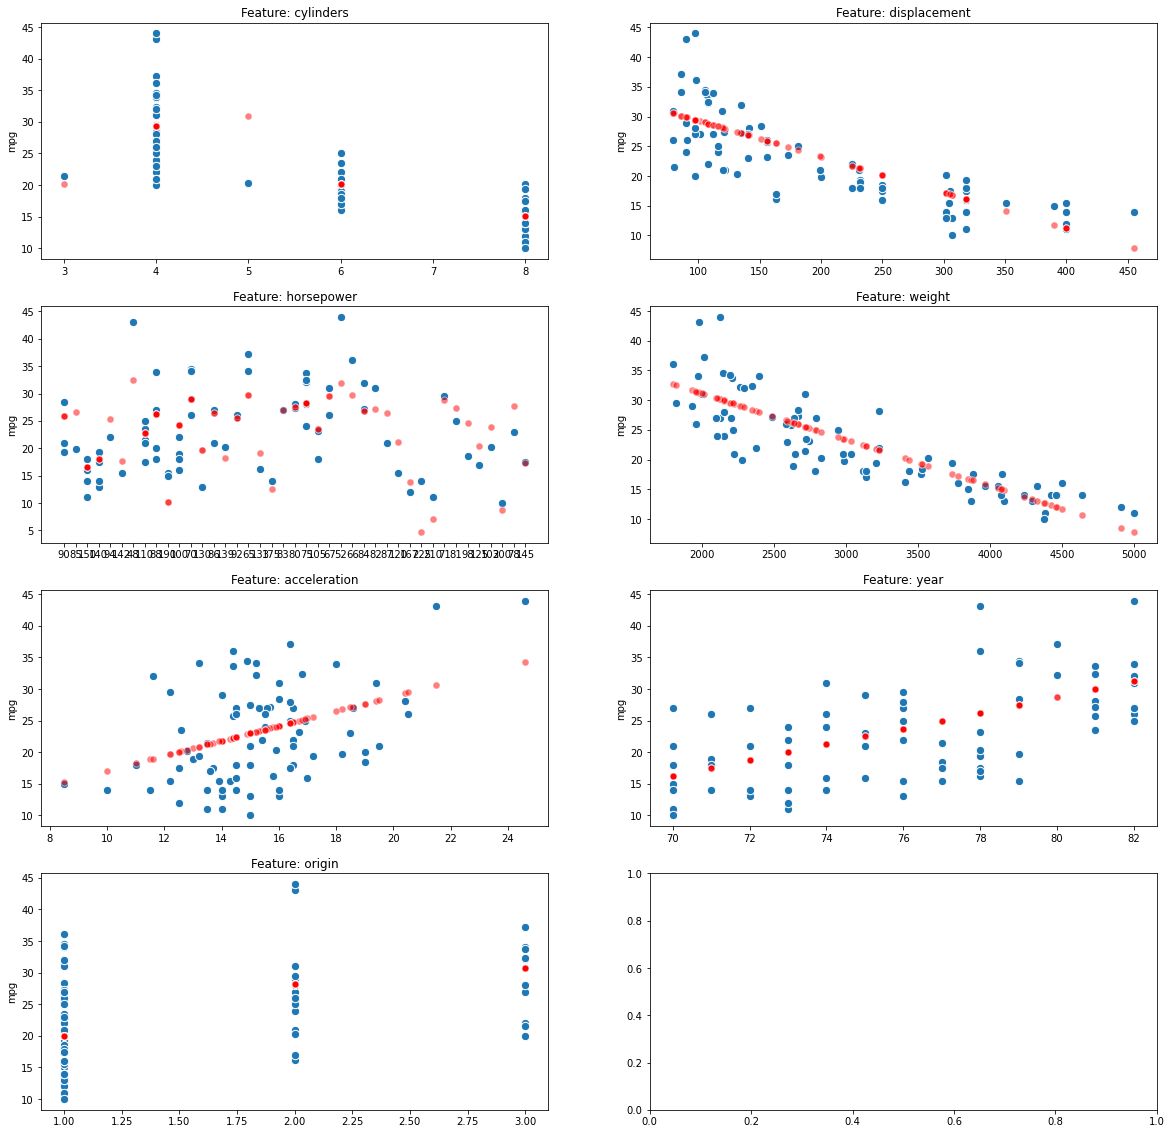

In [58]:
predictions = []
modelNames = []
for separate_variable in data.columns[1:-1]:
    print(f"Fitting model of target MPG onto {separate_variable}")
    model = fit_linear_regression(target=Y_train, \
                                  predictor=X_train[separate_variable], \
                                  add_intercept=True,\
                                 is_categorical= (separate_variable in ["origin", "cylinders"]))
    print(f"Model Summary:\n{model.summary()}")
    test_prediction = predict(model, X_test[separate_variable],True, (separate_variable in ["origin", "cylinders"]))
    predictions.append(test_prediction)
    modelNames.append(separate_variable)
    
    print("\n\n--------------------------------------------\n\n")

print("Plotting test data: actual versus  predictions for each model")
plot_train_test_response2( X_test, Y_test, predictions,  modelNames)


In [ ]:
# Observations:
'''
For models of:
    1. Cylinder: reasonable R-square, high F-statistic, very high condition number (obvious as it is one-to encoding)
    2. Displacement: reasonable R-square, higher F-statistic that model 1, lower cond number, all variables are significant
    3. horsepower: lower R-squared than models 1&2
    4. weight: higher R-squared than all previous, & significantly higher F-statistic
    5. acceleration: all values are bad, from its post plot it tends to give a near-constant (almost horizontal) predictions
    6. year and origin have low R-squared values and lower F-statistics as well. Their plots clariy they dont predict well at all.
'''

## Given no further improvements (columns drop/change for colinearity) I chose the model built on weight
## high R-squared value, better fit than all of them. and its F-statistic is high and the coefficients' p-values are good


In [59]:
# d) 
## first, encode the categorical data:
X_train_encoded = pd.get_dummies(X_train, columns=["origin", "cylinders"], prefix=["origin", "cylinders"], prefix_sep="_")

In [81]:
model_on_all_data = fit_linear_regression(target=Y_train, \
                                  predictor=X_train_encoded, \
                                  add_intercept=True,\
                                 is_categorical= False)

In [82]:
print(model_on_all_data.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     156.3
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          2.95e-118
Time:                        00:02:02   Log-Likelihood:                -803.31
No. Observations:                 317   AIC:                             1631.
Df Residuals:                     305   BIC:                             1676.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6706      3.226     -3.308      0.0

In [84]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [89]:
# e) from (d) using p-value indicating variable significance we will drop: ['displacement',horsepower', 'acceleration', 'origin_3', 
# 'cylinders_4', 'cylinders_5', 'cylinders_8' ]
# gradualy removing 1 of them until all variables are significant resulted in removing all of them 
X_train_significant = X_train_encoded.drop(['displacement', 'acceleration', 'horsepower', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8'], axis=1)


In [90]:
model_on_all_data_sign = fit_linear_regression(target=Y_train, \
                                  predictor=X_train_significant, \
                                  add_intercept=True,\
                                 is_categorical= False)
print(model_on_all_data_sign.summary())
# There is obvious colinearity as seen from the very high condition number 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     315.5
Date:                Sat, 16 Apr 2022   Prob (F-statistic):          1.74e-119
Time:                        00:07:07   Log-Likelihood:                -817.41
No. Observations:                 317   AIC:                             1647.
Df Residuals:                     311   BIC:                             1669.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.5927      3.190     -3.948      0.0

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [92]:
# f) 
n_alphas = 100
alphas = np.logspace(10, -2, n_alphas)
param_grid = [{'alpha': alphas}]
ridge_reg=Ridge(normalize=True)
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5,scoring='neg_mean_squared_error')


In [102]:
X_train_significant = X_train_encoded.drop(['displacement', 'acceleration', 'horsepower', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8'], axis=1)
X_ridge_data =  sm.add_constant(X_train_significant)        
Y_train = Y_train.to_numpy( dtype=float)
X_ridge_data = X_ridge_data.to_numpy( dtype=float)



AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [96]:
X_test_encoded = pd.get_dummies(X_test, columns=["origin", "cylinders"], prefix=["origin", "cylinders"], prefix_sep="_")
X_test_significant = X_test_encoded.drop(['displacement', 'acceleration', 'horsepower', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8'], axis=1)
X_ridge_test_data =  sm.add_constant(X_test_significant)        
Y_test = Y_test.to_numpy( dtype=float)
X_ridge_data = X_ridge_test_data.to_numpy( dtype=float)


In [95]:
grid_search.fit(X_ridge_data, Y_train)

GridSearchCV(cv=5, estimator=Ridge(normalize=True),
             param_grid=[{'alpha': array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6....
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02])}],
             scoring='neg_mean_squared_error')

In [97]:
best_lambda=grid_search.best_params_["alpha"]
print("Ridge best_lambda = ",best_lambda)
final_model = grid_search.best_estimator_
y2_pred = final_model.predict(X_ridge_test_data)
MSE=mean_squared_error(y2_pred, Y_test)
print("MSE =",MSE)

Ridge best_lambda =  0.01
MSE = 11.53095337359314


In [98]:
# g) Lasso:
from sklearn.linear_model import Lasso

In [103]:
X_ridge_data.shape

(317, 7)

In [104]:
lasso_reg=Lasso(normalize=True)
grid_search_lasso = GridSearchCV(lasso_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_ridge_data, Y_train)
best_lambda=grid_search.best_params_["alpha"]
print("best_lambda = ",best_lambda)
final_model = grid_search.best_estimator_

best_lambda =  0.01


In [105]:
y2_pred = final_model.predict(X_ridge_test_data)
MSE=mean_squared_error(y2_pred, Y_test)
print("MSE =",MSE)

MSE = 11.53095337359314


In [ ]:
# h) 

In [ ]:
# i) 

In [ ]:
# j) 